# SPECTRAL COARSE GRAINING: EXAMPLE USAGE

In [4]:
import os
# If you are running this from ~/python_scripts/mycode.py
# change directory to the root of the repository
# All utils assume that the working directory is the root directory of the github folder
os.chdir('../')

import sys
sys.path.insert(0, os.path.join(os.getcwd(),'utils'))

# import local utils
from SpectralMethod import spectral_method
from visualization_networkx import visualize_micro_macro

In [6]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [7]:
# We use the Karate Club network as an example 
G = nx.karate_club_graph()
# The method takes as input a pandas edgelist with source, target and weight
edgelist = nx.to_pandas_edgelist(G)

## To compute the Coarse Grained network, we need to decide the values of n_relevant_eigenvectors and I
### n_relevant_eigenvectors (int): number of left eigenvectors we choose to represent the large-scale behavior of the network. It must be less than the number of nodes. The larger the number, the more fine grained the Coarse Grained network is. 
### I (int): number of intervals in which we divide the left eigenvectors. The larger this number is, the more fine grained the Coarse Grained network is. 

## So, with these two parameters we determine the total number of Super Nodes we will have in the Coarse Grained network. Make them small to have a lower number of Super Nodes.
## 

In [8]:
# We compute the mapping and the edgelist of the Coarse Grained network
mapping, coarse_grained_edgelist = spectral_method(edgelist,
                                                   n_relevant_eigenvectors = 3,
                                                   I = 3)

# VISUALIZATION 

In [9]:
G_macro = nx.from_pandas_edgelist(coarse_grained_edgelist, source='source', target='target',edge_attr='weight')

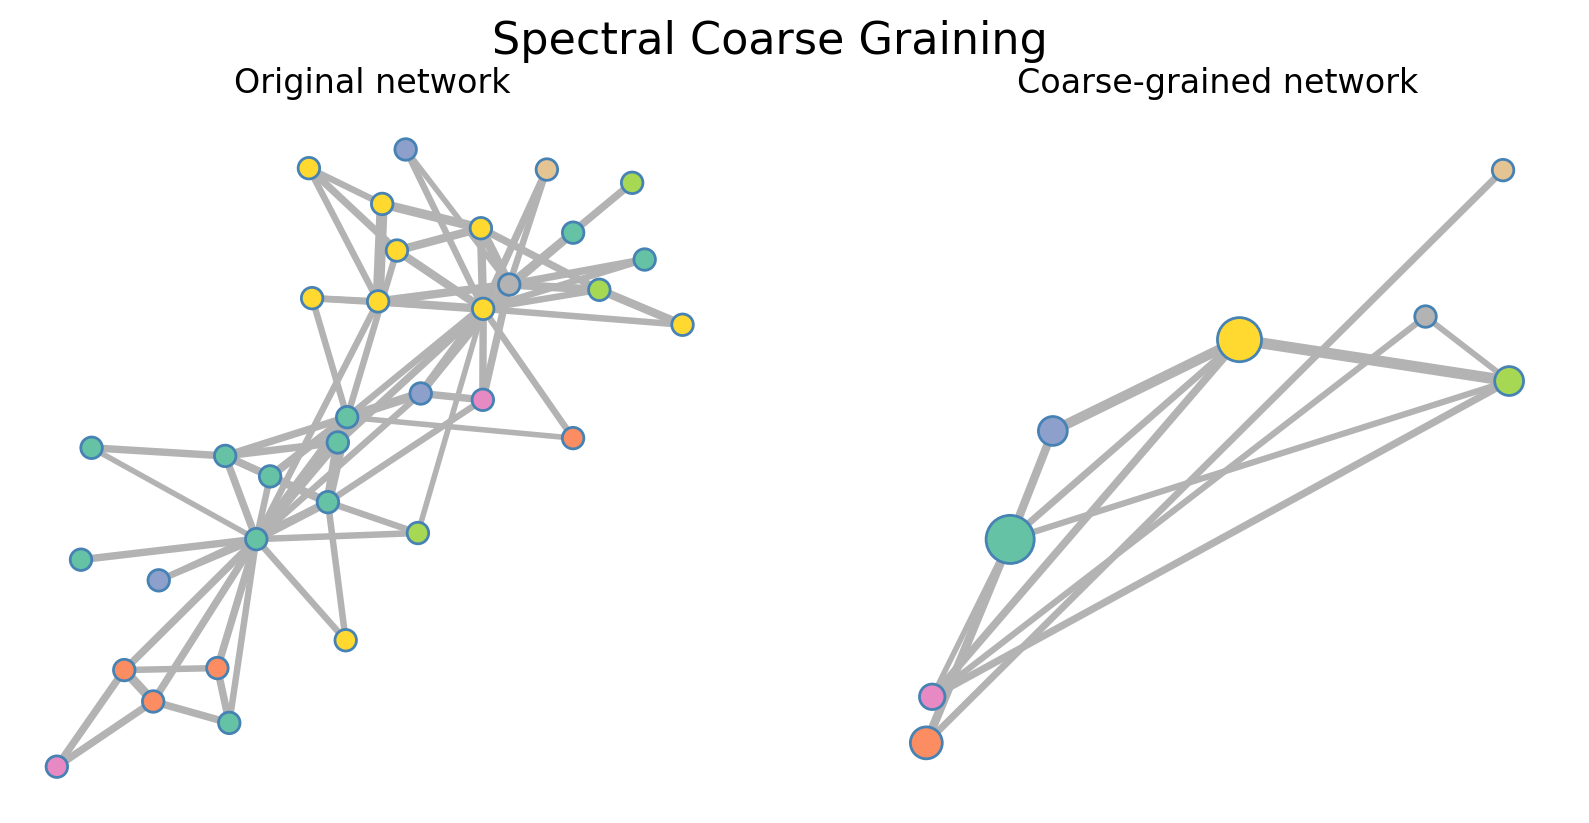

<Figure size 640x480 with 0 Axes>

In [11]:
visualize_micro_macro(
    G, mapping, G_macro,
    min_ns=60, max_ns=300, min_lw=2, max_lw=4, 
    ec='.7', nc='w', nec='steelblue',
    all_colorful=True, node_cmap='Set2',
    method_title = 'Spectral Coarse Graining', name_file = 'Karate_Club_Spectral', file_format = 'png',
)